In [1]:
import os
import json
import glob
import gzip
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scanpy as sc

import sys
sys.path.append("../../")
from digitalhistopathology.embeddings.gene_embedding import GeneEmbedding

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

/storage/homefs/ll25y867/.conda/envs/digitalhisto/lib/python3.10/site-packages/stlearn/tl/cci/het.py:206: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)
2025-12-17 15:13:20.303718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software.9/software/code-server/4.93.1/lib:/software.9/software/code-server/4.93.1/lib
2025-12-17 15:13:20.303828: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


# Visualization of the invasive cancer clusters

In [2]:
# Load configuration
with open("../../config/config_notebooks_HER2.json", "r") as config_file:
    config = json.load(config_file)

with gzip.open(config['patches_info_path']) as f:
    patches_info = pickle.load(f)

patches_info = pd.DataFrame(patches_info)


In [3]:
def create_legend_gene_expression(gene_exp):
    if gene_exp == 0:
        return "Not expressed"
    elif gene_exp < 2:
        return "Low expression"
    elif gene_exp < 4:
        return "Medium expression"
    else:
        return "High expression"

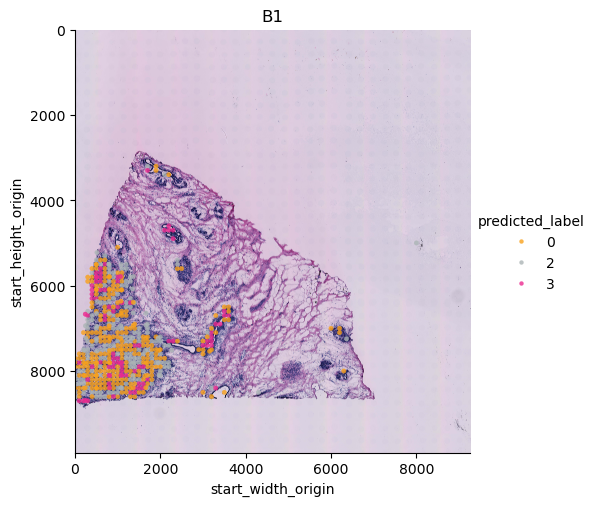

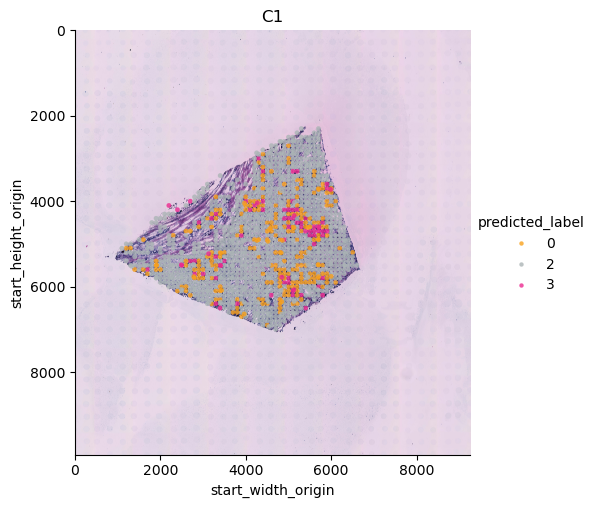

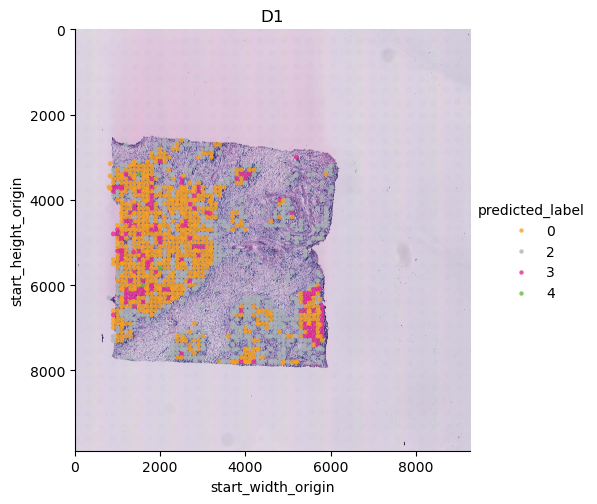

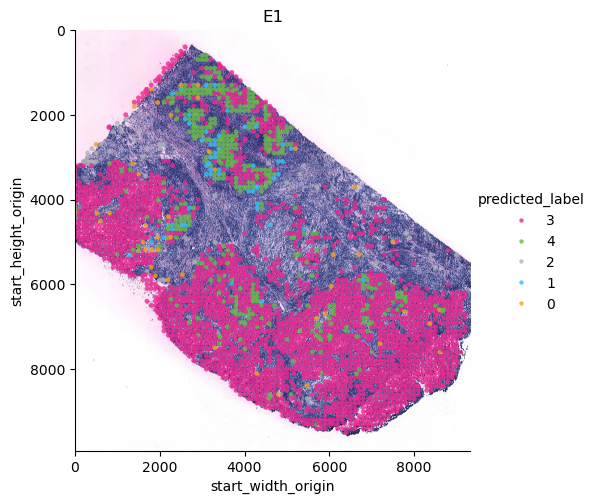

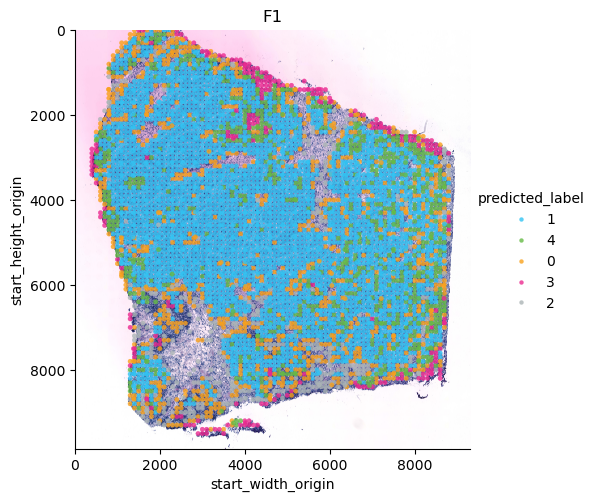

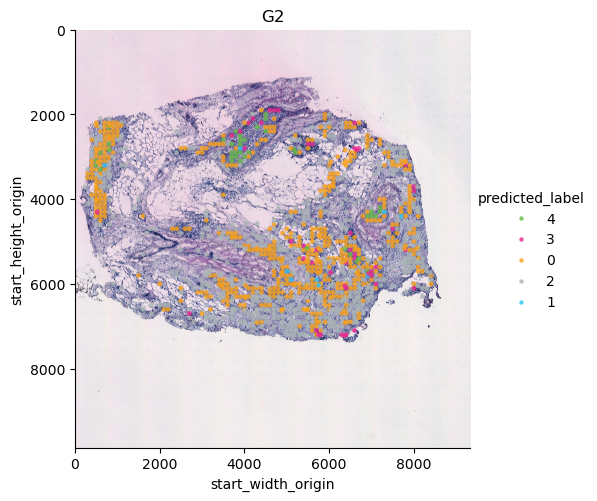

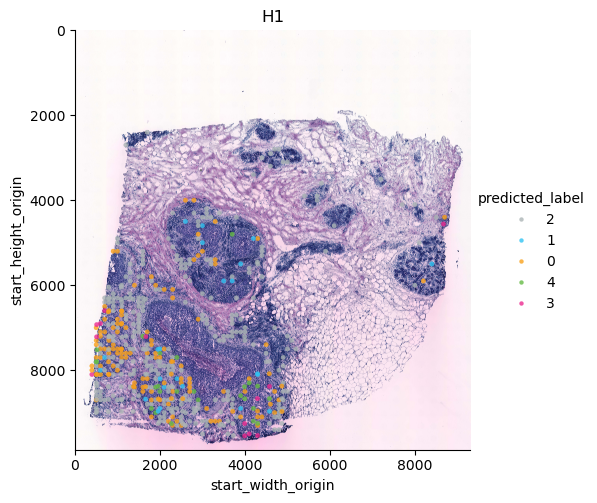

In [4]:
# UNI full Koleo
path_to_invasive_clustering_full = os.path.join(config['retrained_benchmark_folder2'], "invasive_cancer_clustering", "kmeans")
labels = pd.read_csv(os.path.join(path_to_invasive_clustering_full, "uni_full_koleo_16384_prototypes/invasive_labels_5_clusters_umap_min_dist_0.001_n_neighbors_250.csv"), index_col=0)

palette={'0': '#F9A11B', '2': '#ACB5B6', '4': '#66BB46', '3': '#EC2A90', '1': '#31C4F3', 'not invasive': 'white'}

for patient in ["B1", "C1", "D1", "E1", "F1", "G2", "H1"]:
    subset_emb = GeneEmbedding()
    n_patches = len(patches_info[patches_info["name_origin"] == patient])
    subset_emb.emb = ad.AnnData(X=np.zeros((n_patches, 1)))
    subset_emb.emb.obs = patches_info[patches_info["name_origin"] == patient]
    subset_emb.emb.obs.set_index('name', inplace=True)
    subset_emb.emb.obs['predicted_label'] = [str(labels.loc[idx, 'predicted_label']) if idx in labels.index else "not invasive" for idx in subset_emb.emb.obs.index]
    subset_emb.emb = subset_emb.emb[subset_emb.emb.obs["predicted_label"] != "not invasive"]
    subset_emb.plot_spot_location_with_color_on_origin_image(color='predicted_label', s=10, palette=palette)

    plt.show()